# Lasso Regression

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples=100,n_features=1,n_informative=1,
                       n_targets=1,noise=20,random_state=13)

[28.12597332]
-2.2710144261783825


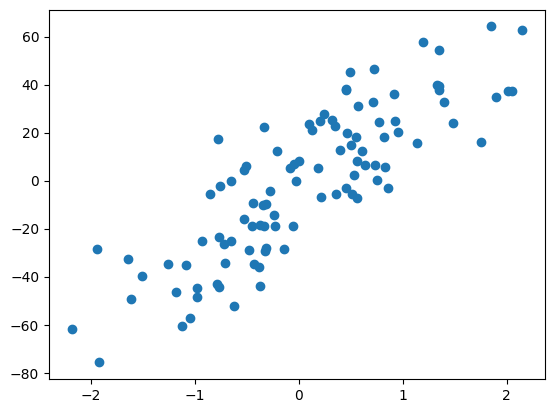

In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train,Y_test =train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_)
print(lr.intercept_)

plt.scatter(X,y)
plt.show()

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+04, tolerance: 8.397e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

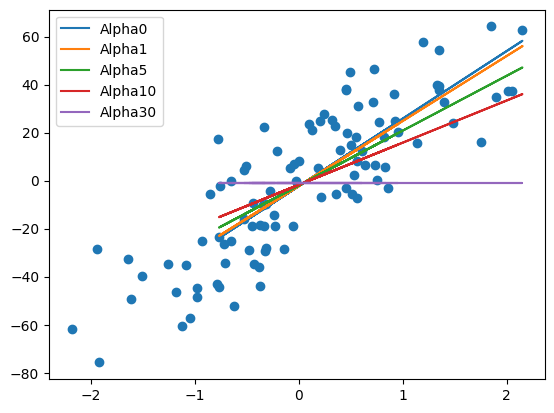

In [39]:
# apply Lasso Regression
from sklearn.linear_model import Lasso
alphas =[0,1,5,10,30]
plt.scatter(X,y)

for i in alphas:
    lasso =Lasso(alpha=i)
    lasso.fit(X_train,Y_train)
    plt.plot(X_test,lasso.predict(X_test),label ='Alpha{}'.format(i))
plt.legend()
plt.show()    

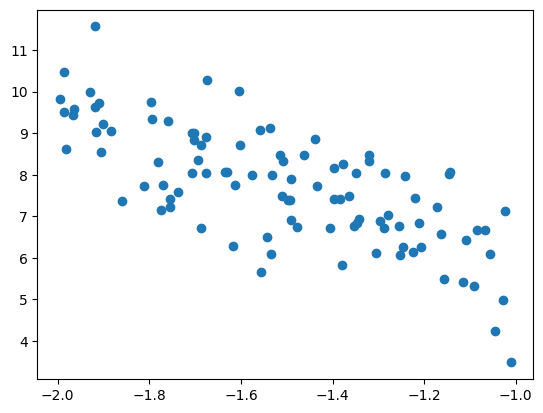

In [40]:
m =100
x1= np.random.rand(m,1) -2
x2 =0.7*x1**2 -2*x1 + 3 +np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.352e+01, tolerance: 1.947e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

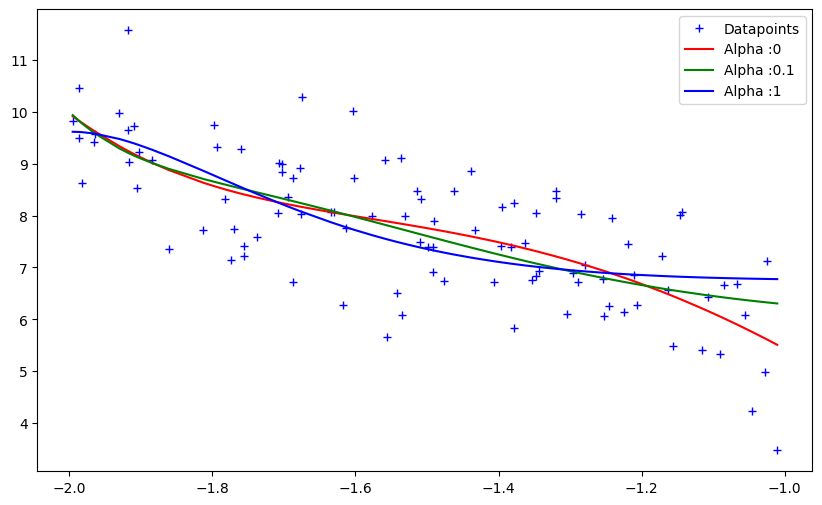

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

def get_preds_lass0(x1,x2,alpha):
    model =Pipeline([('Poly',PolynomialFeatures(degree=16)),
                     ('lasso',Lasso(alpha=alpha))])
    
    model.fit(x1,x2)
    return model.predict(x1)


alphas =[0,0.1,1]
cs =['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label ='Datapoints')

for alpha ,c in zip(alphas,cs):
    
    preds =get_preds_lass0(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha :{}'.format(alpha)
             )
    
plt.legend()
plt.show()    
    


# Key Points

In [50]:
from sklearn.datasets import load_diabetes
data =load_diabetes()
df =pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] =data.target
A_train ,A_test,B_train ,B_test =train_test_split(X,y,test_size=0.2 ,random_state=4)

POINT-1 :
As alpha increase the cofficent become zero and lasso perform feature selection

In [51]:
from sklearn.metrics import r2_score
coefs =[]
r2_scores =[]

for i in [0,1,10,100]:
    reg = Lasso(alpha=i)
    reg.fit(A_train,B_train)
    coefs.append(reg.coef_.tolist())
    c =reg.predict(A_test)
    r2_scores.append(r2_score(B_test,c))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+04, tolerance: 7.150e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

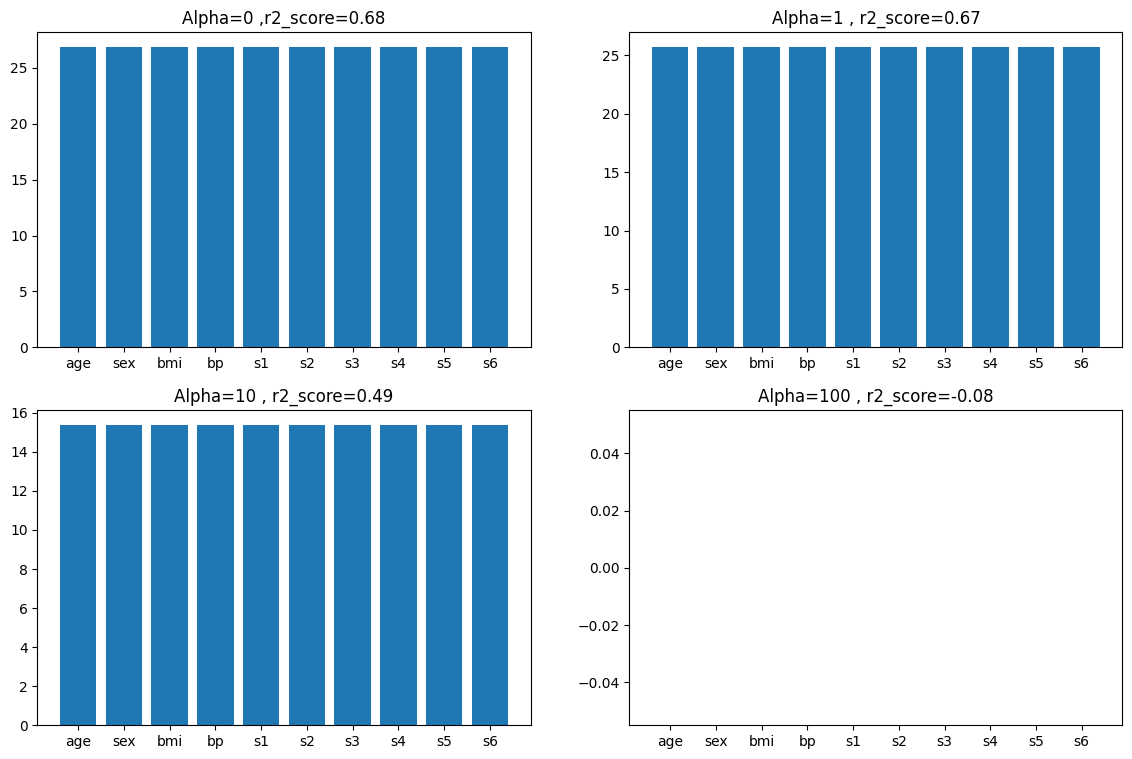

In [52]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0 ,r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=1 , r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=10 , r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=100 , r2_score={}'.format(round(r2_scores[3],2)))


plt.show()   # See the Y-axis 

Point 2. Higher Cofficents are affected more 

In [53]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(A_train,B_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+04, tolerance: 7.150e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

In [54]:
input_array = np.array(coefs).T
input_array

array([[26.84461765, 26.84450277, 26.84346883, 26.83312943, 26.72973547,
        25.69579586, 15.35639973,  0.        ,  0.        ,  0.        ]])

In [56]:
#coef_df = pd.DataFrame(input_array,columns=data.feature_names)
#coef_df['alpha'] = alphas
#coef_df.set_index('alpha')

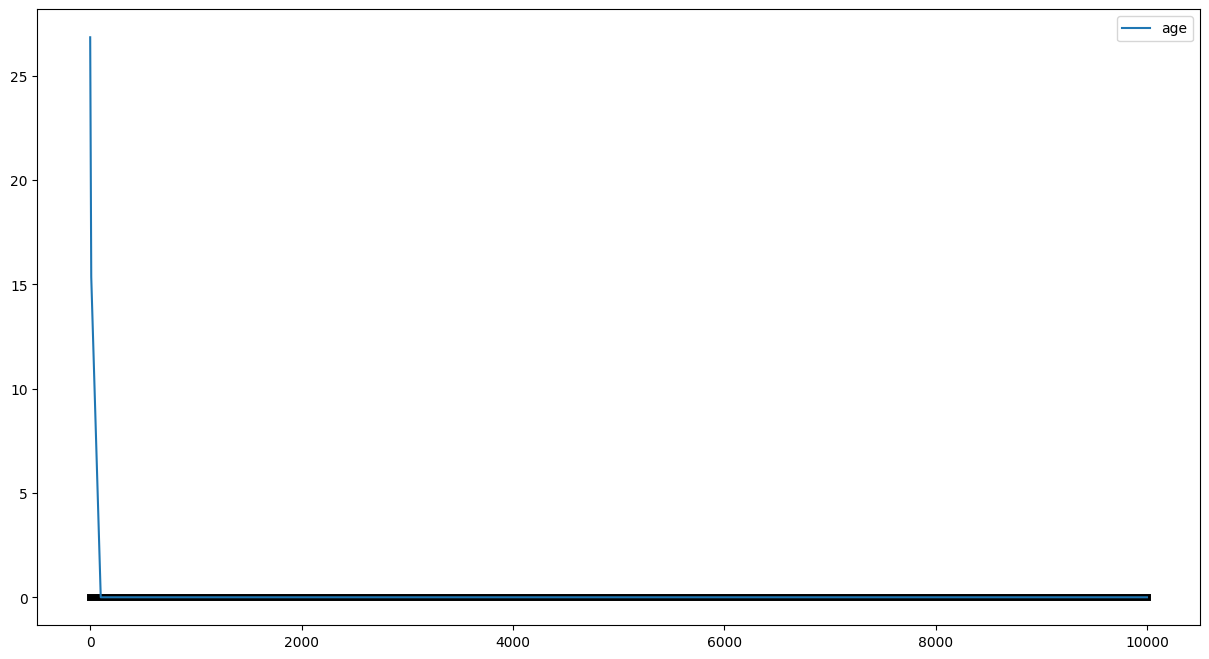

In [57]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

POINT 3. : Bias and Varianc -TradeOFF

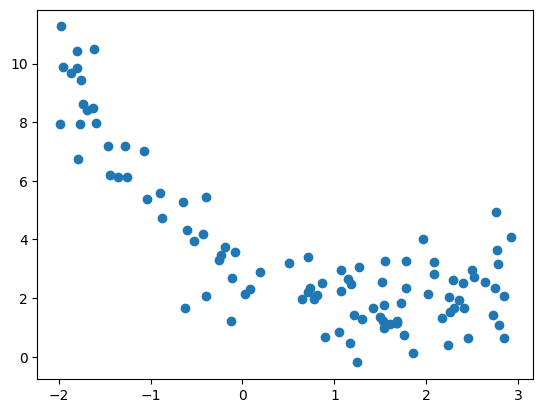

In [58]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


In [60]:
from mlxtend.evaluate import bias_variance_decomp


alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+01, tolerance: 6.456e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

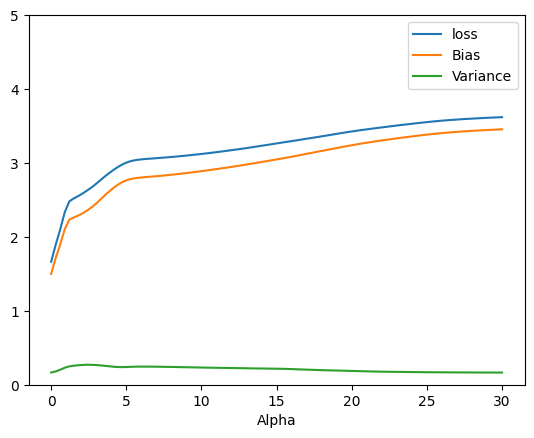

In [61]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

POINT 4. : Impact on Loss Function

[27.82809103]
-2.29474455867698


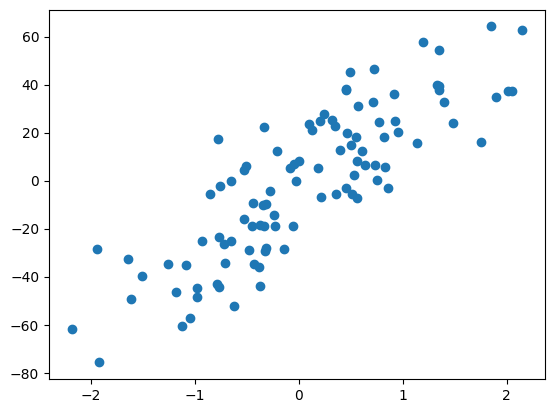

In [62]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [63]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [64]:
def predict(m):
    return m*X - 2.29

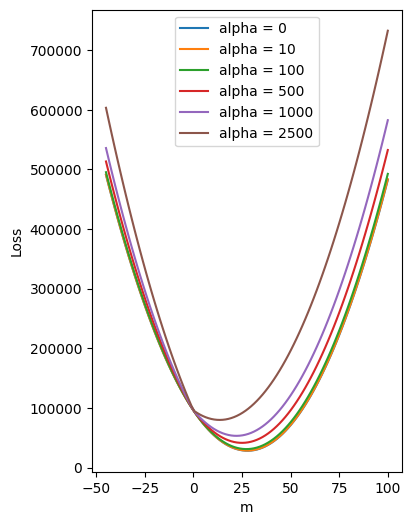

In [66]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,100,500,1000,2500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()